# 📊 Marketing Campaign Analytics Project

## 🔹 Introduction

In today’s competitive digital landscape, businesses invest heavily in marketing campaigns across channels such as **Google Ads, Facebook Ads, Email Marketing, and Display Networks**. While these campaigns generate large volumes of data — impressions, clicks, conversions, and engagement signals — the **real challenge lies in extracting insights that guide decision-making**.

This project presents a **comprehensive end-to-end marketing analytics pipeline** built with **Python**, designed to transform raw campaign data into actionable intelligence. The goal is to help marketing teams **understand performance, optimize budget allocation, and forecast outcomes**.

The pipeline integrates three major analytical approaches:

1. **Classification** 🧮

   * Predicts whether a campaign will generate a **positive ROI**.
   * Helps marketing teams prioritize campaigns likely to succeed.

2. **Regression** 📈

   * Models ROI as a **continuous variable**, enabling fine-grained prediction of expected returns.
   * Provides quantitative benchmarks to compare campaigns.

3. **Clustering** 🔍

   * Segments campaigns into **behavioral groups** based on metrics like CTR, CPC, CPA, and ROI.
   * Reveals campaign archetypes such as *“High ROI – Low Cost”* or *“Low ROI – High Cost”*.
   * Supports strategic targeting and resource optimization.

## 🔹 Why This Project Matters

Marketing teams often face key questions:

* Which campaigns drive the **highest ROI**?
* Are we paying too much per conversion (**high CPA**)?
* Do different campaign groups show distinct **behavioral patterns**?
* Can we **predict outcomes** before fully committing budget?

This project addresses these questions through:

* **Automated metric computation** (CTR, CPC, CPA, ROI).
* **Robust preprocessing and cleaning** of marketing data.
* **Model training and evaluation** across multiple approaches.
* **Cluster profiling** with interpretable labels (e.g., *High ROI – Low Cost*).
* **Visual reports and dashboards** for stakeholder communication.

## 🔹 Outcomes

By the end of this pipeline, the marketing team will have:

* A **processed dataset** enriched with calculated KPIs.
* A **model comparison report** showing how classification, regression, and clustering perform on the data.
* **Cluster profiles** that highlight strengths and weaknesses of campaign groups.
* **Visual insights** (distribution plots, scatter plots, pairplots, cluster charts) that make results interpretable and actionable.

---

⚡ In short, this project transforms raw marketing logs into **strategic intelligence**, enabling **data-driven decision-making** for campaign optimization and budget allocation.

---


In [2]:
# Standard Imports
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sn
import os
from typing import List, Tuple, Dict

# Modelling Imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, precision_score, recall_score,
                             mean_absolute_error, mean_squared_error, r2_score, confusion_matrix,
                             classification_report)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Configure plotting aesthetics
sn.set(style="whitegrid", palette="muted", font_scale=1.0)
%matplotlib inline

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/kaggle/input/marketing-campaign-performance-dataset/marketing_campaign_dataset.csv")

In [6]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [7]:
df.tail()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10
199999,200000,Innovate Industries,Social Media,Women 35-44,45 days,Google Ads,0.01,"$13,835.00",6.64,Chicago,Spanish,924,7287,8,Tech Enthusiasts,2021-12-11


In [8]:
df.shape

(200000, 16)

In [9]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [10]:
df.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [12]:
df.isna().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [13]:
df.nunique()

Campaign_ID         200000
Company                  5
Campaign_Type            5
Target_Audience          5
Duration                 4
Channel_Used             6
Conversion_Rate         15
Acquisition_Cost     15001
ROI                    601
Location                 5
Language                 5
Clicks                 901
Impressions           9001
Engagement_Score        10
Customer_Segment         5
Date                   365
dtype: int64

In [14]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [15]:
df.describe(include="all")

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
count,200000.000000,200000,200000,200000,200000,200000,200000.000000,200000,200000.000000,200000,200000,200000.000000,200000.000000,200000.000000,200000,200000
unique,NaN,5,5,5,4,6,NaN,15001,NaN,5,5,NaN,NaN,NaN,5,365
top,NaN,TechCorp,Influencer,Men 18-24,30 days,Email,NaN,"$16,578.00",NaN,Miami,Mandarin,NaN,NaN,NaN,Foodies,2021-01-01
freq,NaN,40237,40169,40258,50255,33599,NaN,32,NaN,40269,40255,NaN,NaN,NaN,40208,548
mean,100000.500000,NaN,NaN,NaN,NaN,NaN,0.080070,NaN,5.002438,NaN,NaN,549.772030,5507.301520,5.494710,NaN,NaN
std,57735.171256,NaN,NaN,NaN,NaN,NaN,0.040602,NaN,1.734488,NaN,NaN,260.019056,2596.864286,2.872581,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,2.000000,NaN,NaN,100.000000,1000.000000,1.000000,NaN,NaN
25%,50000.750000,NaN,NaN,NaN,NaN,NaN,0.050000,NaN,3.500000,NaN,NaN,325.000000,3266.000000,3.000000,NaN,NaN
50%,100000.500000,NaN,NaN,NaN,NaN,NaN,0.080000,NaN,5.010000,NaN,NaN,550.000000,5517.500000,5.000000,NaN,NaN
75%,150000.250000,NaN,NaN,NaN,NaN,NaN,0.120000,NaN,6.510000,NaN,NaN,775.000000,7753.000000,8.000000,NaN,NaN


In [16]:
def clean_numeric_columns(df: pd.DataFrame, cols: List[str]) -> pd.DataFrame:
    """
    Clean and convert specified columns to float64.
    Removes commas, dollar signs, percent signs and trims whitespace.
    Non-convertible values become NaN.

    Parameters
    ----------
    df : pd.DataFrame
    cols : List[str]

    Returns
    -------
    pd.DataFrame
    """
    for col in cols:
        if col in df.columns:
            # Convert to string first to safely operate replace on mixed types
            df[col] = df[col].astype(str).str.replace(",", "", regex=False) \
                                   .str.replace("$", "", regex=False) \
                                   .str.replace("%", "", regex=False) \
                                   .str.strip()
            df[col] = pd.to_numeric(df[col], errors="coerce")
   
    return df

### Clean Numeric Columns

In [17]:
cols = ["Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score"]

df = clean_numeric_columns(df, cols)

# Exploratory plots

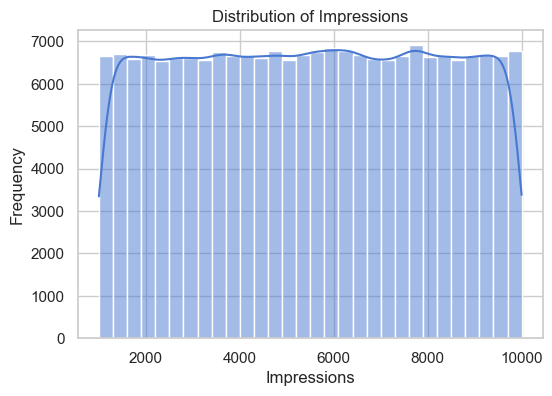

In [18]:
# 1. Distribution of impressions
plt.figure(figsize=(6,4))
sn.histplot(df["Impressions"], bins=30, kde=True)
plt.title("Distribution of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Frequency")

plt.show()

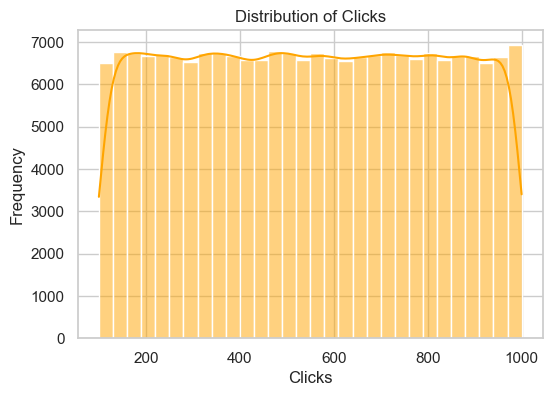

In [19]:
# 2. Distribution of clicks
plt.figure(figsize=(6,4))
sn.histplot(df["Clicks"], bins=30, kde=True, color="orange")
plt.title("Distribution of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Frequency")

plt.show()

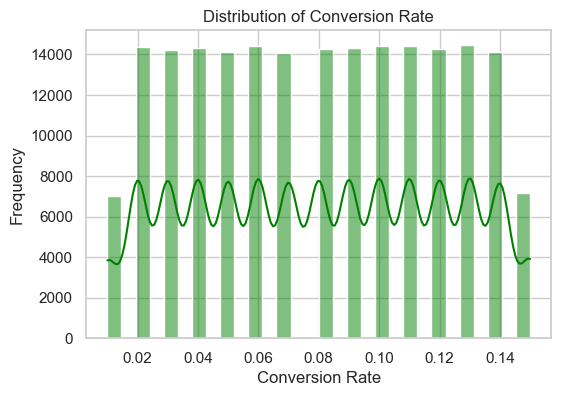

In [20]:
# 3. Conversion rate distribution
plt.figure(figsize=(6,4))
sn.histplot(df["Conversion_Rate"], bins=30, kde=True, color="green")
plt.title("Distribution of Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")

plt.show()

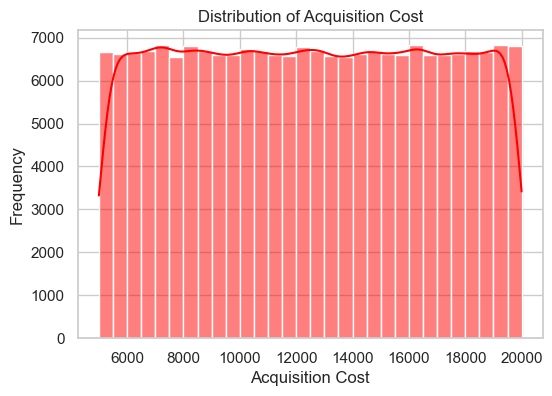

In [21]:
# 4. Acquisition cost distribution
plt.figure(figsize=(6,4))
sn.histplot(df["Acquisition_Cost"], bins=30, kde=True, color="red")
plt.title("Distribution of Acquisition Cost")
plt.xlabel("Acquisition Cost")
plt.ylabel("Frequency")

plt.show()

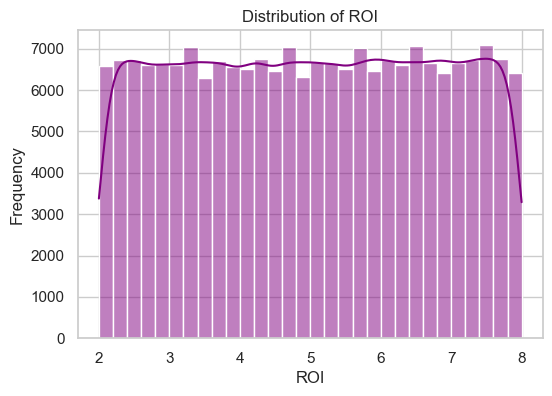

In [22]:
# 5. ROI distribution
plt.figure(figsize=(6,4))
sn.histplot(df['ROI'], bins=30, kde=True, color="purple")
plt.title("Distribution of ROI")
plt.xlabel("ROI")
plt.ylabel("Frequency")

plt.show()

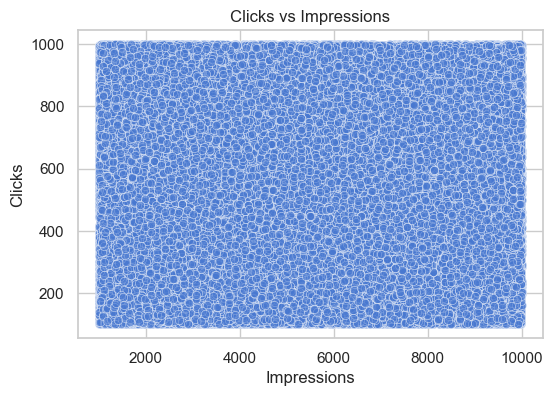

In [23]:
# 6. Clicks vs Impressions scatter
plt.figure(figsize=(6,4))
sn.scatterplot(x='Impressions', y='Clicks', data=df, alpha=0.6)
plt.title("Clicks vs Impressions")
plt.xlabel("Impressions")
plt.ylabel("Clicks")

plt.show()

In [24]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [25]:
# Keep raw copy of text columns (e.g., Campaign or Source)
df = df.copy()

# Identify candidate numeric columns present in dataset
candidate_numeric = []
for c in ["Impressions", "Clicks", "Conversion_Rate", "Acquisition_Cost", "ROI", "Engagement_Score", "CTR"]:
    if c in df.columns:
        candidate_numeric.append(c)

In [26]:
# Clean numeric columns
df = clean_numeric_columns(df, candidate_numeric)

In [27]:
df.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost    float64
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [28]:
def safe_divide(numer: pd.Series, denom: pd.Series) -> pd.Series:
    """Elementwise division avoiding division by zero (returns NaN when denom==0)."""
    return numer / denom.replace(0, np.nan)

# Feature Engineering & Metric Calculations

#### Metrics Columns Available

- conversion_rate (usually conversions / clicks)

- acquisition_cost (typically Spend / Conversions)

- roi (already precomputed ROI, likely (Revenue - Spend) / Spend)

- clicks

- engagement_score

- impressions

Notice: there’s no spend and no conversions directly available.

🔎 Step 1: What We Need to Reconstruct

Revenue formula:

Revenue = Spend × (1+ROI)

So if ROI is already in the dataset, we don’t actually need to recompute it — but if we want Revenue as a column, we must first back out Spend.

🔎 Step 2: Derive Missing Quantities

We can use two different routes depending on what’s most reliable in the dataset.

From Acquisition Cost (CPA)

Spend = AcquisitionCost × Conversions

But conversions = clicks × conversion_rate (if conversion_rate is in decimal, not %).
So:

Spend = AcquisitionCost × (Clicks × ConversionRate)

From ROI directly
If ROI and Spend are consistent, then:

Revenue = Spend × (1 + ROI)

## 📊 Marketing Metrics Formulas Recap

- CTR (Click-Through Rate):

𝐶𝑇𝑅 = 𝐶𝑙𝑖𝑐𝑘𝑠 / 𝐼𝑚𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛𝑠

- CPC (Cost per Click):

𝐶𝑃𝐶 = 𝑆𝑝𝑒𝑛𝑑 / 𝐶𝑙𝑖𝑐𝑘𝑠

- CPA (Cost per Acquisition):

𝐶𝑃𝐴 = 𝑆𝑝𝑒𝑛𝑑 / 𝐶𝑜𝑛𝑣𝑒𝑟𝑠𝑖𝑜𝑛𝑠

- ROI (Return on Investment):

𝑅𝑂𝐼 = 𝑅𝑒𝑣𝑒𝑛𝑢𝑒 − 𝑆𝑝𝑒𝑛𝑑 / 𝑆𝑝𝑒𝑛𝑑

In [29]:
def compute_revenue(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute Spend and Revenue when dataset has only
    conversion_rate, acquisition_cost, roi, clicks, impressions.
    """
    # Step 1: compute conversions
    if "Clicks" in df.columns and "Conversion_Rate" in df.columns:
        df["Conversions"] = df["Clicks"] * df["Conversion_Rate"]
    else:
        df["Conversions"] = np.nan

    # Step 2: compute spend
    if "Acquisition_Cost" in df.columns and "Conversions" in df.columns:
        df["Spend"] = df["Acquisition_Cost"] * df["Conversions"]
    else:
        df["Spend"] = np.nan

    # Step 3: compute revenue from ROI
    if "ROI" in df.columns and "Spend" in df.columns:
        df["Revenue"] = df["Spend"] * (1 + df["ROI"])
    else:
        df["Revenue"] = np.nan

    return df

In [30]:
def compute_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute standard marketing metrics:
    - CTR = Clicks / Impressions # Already computed
    - CPC = Spend / Clicks
    - CPA = Spend / Conversions
    - ROI = (Revenue - Spend) / Spend # Already computed
    
    If compute_revenue() is already created:
    - df['spend']
    - df['conversions']
    - df['revenue']
    """
    # CTR
    if "Clicks" in df.columns and "Impressions" in df.columns:
        df["CTR"] = safe_divide(df["Clicks"], df["Impressions"])
        
    
    # CPC
    if "Spend" in df.columns and "Clicks" in df.columns:
        df["CPC"] = safe_divide(df['Spend'], df['Clicks'])

    # CPA
    if "Spend" in df.columns and "Conversions" in df.columns:
        df["CPA"] = safe_divide(df["Spend"], df["Conversions"])

    # ROI
    # Available In The Dataset 
    return df

## Create Missing Columns

In [31]:
df = compute_revenue(df)

In [32]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Conversions,Spend,Revenue
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,20.24,327361.76,2.386467e+06
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,13.92,160998.72,1.064202e+06
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,40.88,416976.00,3.410864e+06
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,23.87,303721.88,1.989378e+06
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,18.95,311765.40,2.338240e+06


In [33]:
df = compute_metrics(df)

In [34]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Impressions,Engagement_Score,Customer_Segment,Date,Conversions,Spend,Revenue,CTR,CPC,CPA
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,...,1922,6,Health & Wellness,2021-01-01,20.24,327361.76,2.386467e+06,0.263267,646.96,16174.0
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,...,7523,7,Fashionistas,2021-01-02,13.92,160998.72,1.064202e+06,0.015419,1387.92,11566.0
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,...,7698,1,Outdoor Adventurers,2021-01-03,40.88,416976.00,3.410864e+06,0.075864,714.00,10200.0
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,...,1820,7,Health & Wellness,2021-01-04,23.87,303721.88,1.989378e+06,0.119231,1399.64,12724.0
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,...,4201,3,Health & Wellness,2021-01-05,18.95,311765.40,2.338240e+06,0.090217,822.60,16452.0


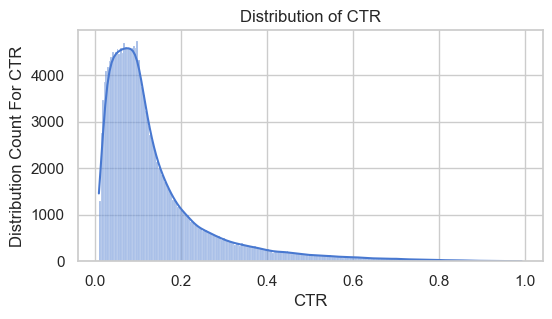

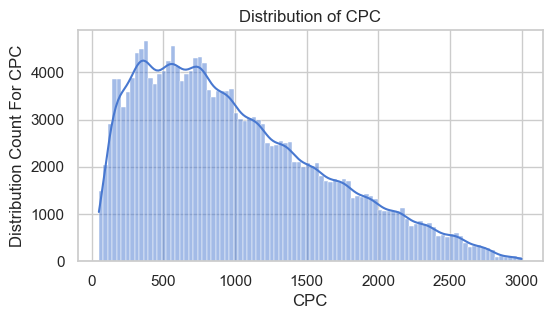

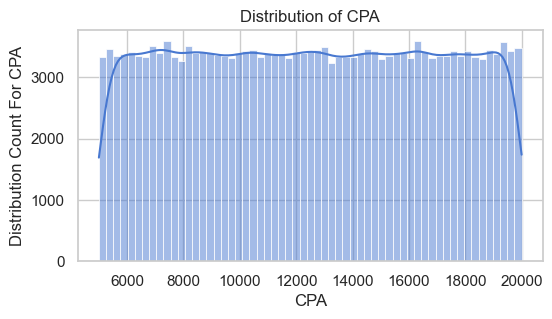

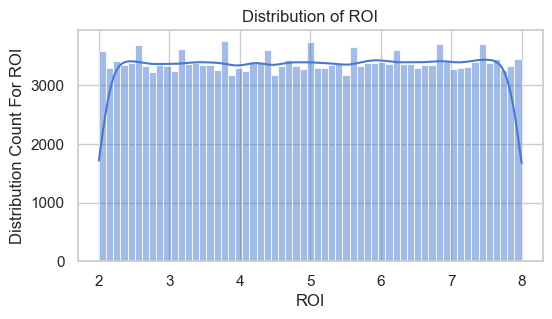

In [35]:
# Quick plots
plot_cols = [c for c in ["CTR", "CPC", "CPA", "ROI"] if c in df.columns]
for c in plot_cols:
    plt.figure(figsize=(6, 3))
    sn.histplot(df[c].dropna(), kde=True)
    plt.title(f"Distribution of {c}")
    plt.xlabel(f"{c}")
    plt.ylabel(f"Distribution Count For {c}")

    plt.show()

In [36]:
if "Spend" in df.columns and "Impressions" in df.columns:
    df["spend_per_impression"] = safe_divide(df["Spend"], df["Impressions"])
if "Clicks" in df.columns and "Impressions" in df.columns:
    df["Click_Rate"] = safe_divide(df["Clicks"], df["Impressions"])

In [37]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Customer_Segment,Date,Conversions,Spend,Revenue,CTR,CPC,CPA,spend_per_impression,Click_Rate
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,...,Health & Wellness,2021-01-01,20.24,327361.76,2.386467e+06,0.263267,646.96,16174.0,170.323496,0.263267
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,...,Fashionistas,2021-01-02,13.92,160998.72,1.064202e+06,0.015419,1387.92,11566.0,21.400867,0.015419
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,...,Outdoor Adventurers,2021-01-03,40.88,416976.00,3.410864e+06,0.075864,714.00,10200.0,54.166797,0.075864
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,...,Health & Wellness,2021-01-04,23.87,303721.88,1.989378e+06,0.119231,1399.64,12724.0,166.880154,0.119231
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,...,Health & Wellness,2021-01-05,18.95,311765.40,2.338240e+06,0.090217,822.60,16452.0,74.212188,0.090217


In [38]:
# Top campaigns by spend if campaign column exists
campaign_cols = [c for c in df.columns if "campaign" in c.lower()]
if campaign_cols:
    camp = campaign_cols[0]
    if "Spend" in df.columns:
        top_spend = df.groupby(camp)["Spend"].sum().sort_values(ascending=False).head(10)
        print("\nTop campaigns by spend (top 10):")
        print(top_spend)
    if "Conversions" in df.columns:
        top_conv = df.groupby(camp)["Conversions"].sum().sort_values(ascending=False).head(10)
        print("\nTop campaigns by conversions (top 10):")
        print(top_conv)


Top campaigns by spend (top 10):
Campaign_ID
1140      2928787.20
61873     2912920.80
131699    2900740.50
163456    2893605.00
169435    2876304.00
77431     2867673.60
145121    2866567.05
194421    2859645.30
11820     2856283.80
57587     2850273.45
Name: Spend, dtype: float64

Top campaigns by conversions (top 10):
Campaign_ID
27546     150.00
88647     150.00
117252    150.00
49596     150.00
119510    150.00
126070    149.85
193272    149.85
158348    149.85
46721     149.85
173038    149.85
Name: Conversions, dtype: float64


# Modelling Classification

In [39]:
# Classification: predict positive ROI
df_int = df.select_dtypes(include="int64")
df_float = df.select_dtypes(include="float64")

In [40]:
df_int

,Campaign_ID,Clicks,Impressions,Engagement_Score
0,1,506,1922,6
1,2,116,7523,7
2,3,584,7698,1
3,4,217,1820,7
4,5,379,4201,3
...,...,...,...,...
199995,199996,858,5988,1
199996,199997,228,3068,7
199997,199998,723,9548,3
199998,199999,528,2763,1


In [41]:
df_float

,Conversion_Rate,Acquisition_Cost,ROI,Conversions,Spend,Revenue,CTR,CPC,CPA,spend_per_impression,Click_Rate
0,0.04,16174.0,6.29,20.24,327361.76,2.386467e+06,0.263267,646.96,16174.0,170.323496,0.263267
1,0.12,11566.0,5.61,13.92,160998.72,1.064202e+06,0.015419,1387.92,11566.0,21.400867,0.015419
2,0.07,10200.0,7.18,40.88,416976.00,3.410864e+06,0.075864,714.00,10200.0,54.166797,0.075864
3,0.11,12724.0,5.55,23.87,303721.88,1.989378e+06,0.119231,1399.64,12724.0,166.880154,0.119231
4,0.05,16452.0,6.50,18.95,311765.40,2.338240e+06,0.090217,822.60,16452.0,74.212188,0.090217
...,...,...,...,...,...,...,...,...,...,...,...
199995,0.06,18365.0,2.84,51.48,945430.20,3.630452e+06,0.143287,1101.90,18365.0,157.887475,0.143287
199996,0.02,8168.0,4.14,4.56,37246.08,1.914449e+05,0.074316,163.36,8168.0,12.140183,0.074316
199997,0.05,13397.0,3.25,36.15,484301.55,2.058282e+06,0.075723,669.85,13397.0,50.722827,0.075723
199998,0.10,18508.0,3.86,52.80,977222.40,4.749301e+06,0.191097,1850.80,18508.0,353.681650,0.191097


In [43]:
df = pd.concat([df_int.reset_index(drop=True), df_float.reset_index(drop=True)], axis=1)


In [44]:
df.head()

,Campaign_ID,Clicks,Impressions,Engagement_Score,Conversion_Rate,Acquisition_Cost,ROI,Conversions,Spend,Revenue,CTR,CPC,CPA,spend_per_impression,Click_Rate
0,1,506,1922,6,0.04,16174.0,6.29,20.24,327361.76,2.386467e+06,0.263267,646.96,16174.0,170.323496,0.263267
1,2,116,7523,7,0.12,11566.0,5.61,13.92,160998.72,1.064202e+06,0.015419,1387.92,11566.0,21.400867,0.015419
2,3,584,7698,1,0.07,10200.0,7.18,40.88,416976.00,3.410864e+06,0.075864,714.00,10200.0,54.166797,0.075864
3,4,217,1820,7,0.11,12724.0,5.55,23.87,303721.88,1.989378e+06,0.119231,1399.64,12724.0,166.880154,0.119231
4,5,379,4201,3,0.05,16452.0,6.50,18.95,311765.40,2.338240e+06,0.090217,822.60,16452.0,74.212188,0.090217


# Thresholding ROI.

- Since ROI only has 1 class we will need to create threshold using the median to create positive and negative classes from the ROI column.

- Threshold on ROI like >median = positive, <=median = negative).

- NOT RECOMMENDED FOR PRODUCTION.

In [45]:
df = df.reset_index(drop=True)

threshold = df["ROI"].median()
df["roi_positive"] = (df["ROI"] > threshold).astype(int)

In [46]:
print("ROI describe:\n", df["ROI"].describe())
print("Unique ROI values:", df["ROI"].unique()[:20])

ROI describe:
 count    200000.000000
mean          5.002438
std           1.734488
min           2.000000
25%           3.500000
50%           5.010000
75%           6.510000
max           8.000000
Name: ROI, dtype: float64
Unique ROI values: [6.29 5.61 7.18 5.55 6.5  4.36 2.86 6.73 3.78 3.49 3.59 4.91 7.06 5.28
 2.91 4.53 4.48 6.08 3.83 7.99]


In [47]:
df["roi_positive"]

0         1
1         1
2         1
3         1
4         1
         ..
199995    0
199996    0
199997    0
199998    0
199999    1
Name: roi_positive, Length: 200000, dtype: int32

In [48]:
print("Overall distribution:", df['roi_positive'].value_counts())

Overall distribution: roi_positive
0    100292
1     99708
Name: count, dtype: int64


In [49]:
df.tail()

,Campaign_ID,Clicks,Impressions,Engagement_Score,Conversion_Rate,Acquisition_Cost,ROI,Conversions,Spend,Revenue,CTR,CPC,CPA,spend_per_impression,Click_Rate,roi_positive
199995,199996,858,5988,1,0.06,18365.0,2.84,51.48,945430.20,3.630452e+06,0.143287,1101.90,18365.0,157.887475,0.143287,0
199996,199997,228,3068,7,0.02,8168.0,4.14,4.56,37246.08,1.914449e+05,0.074316,163.36,8168.0,12.140183,0.074316,0
199997,199998,723,9548,3,0.05,13397.0,3.25,36.15,484301.55,2.058282e+06,0.075723,669.85,13397.0,50.722827,0.075723,0
199998,199999,528,2763,1,0.10,18508.0,3.86,52.80,977222.40,4.749301e+06,0.191097,1850.80,18508.0,353.681650,0.191097,0
199999,200000,924,7287,8,0.01,13835.0,6.64,9.24,127835.40,9.766625e+05,0.126801,138.35,13835.0,17.542939,0.126801,1


In [50]:
classification_results = {}
if "ROI" in df.columns and df["ROI"].notna().sum() > 10:
    print("\nRunning classification to predict positive ROI...")


Running classification to predict positive ROI...


In [51]:
X = df.drop("roi_positive", axis=1)
y = df["roi_positive"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
print("Train class distribution:\n", y_train.value_counts().nunique())
print("Test class distribution:\n", y_test.value_counts().nunique())

Train class distribution:
 2
Test class distribution:
 2


In [54]:
df["roi_positive"].nunique()

2

In [55]:
# Create/Initialize Models For Classification
clf_models = {
            'LogisticRegression': Pipeline([('imp', SimpleImputer(strategy='median')), ('sc', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]),
            'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
            'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42)
}

In [56]:
for name, model in clf_models.items():
    # cross validation AUC where possible
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")
        cv_summary = {"cv_auc_mean": float(np.mean(cv_scores)), "cv_auc_std": float(np.std(cv_scores))}
    except Exception:
        cv_summary = {"cv_auc_mean": None, "cv_auc_std": None}  

    # Train Models.
    model.fit(X_train,  y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    test_acc = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    classification_results[name] = {
        **cv_summary,
        "test_accuracy": float(test_acc),
        "test_f1": float(test_f1),
        "test_auc": float(test_auc) if test_auc is not None else None}

In [57]:
classification_results

{'LogisticRegression': {'cv_auc_mean': 0.9999994234325709,
  'cv_auc_std': 5.744225202115621e-08,
  'test_accuracy': 0.999625,
  'test_f1': 0.9996239753327818,
  'test_auc': 0.9999993299943654},
 'RandomForest': {'cv_auc_mean': 1.0,
  'cv_auc_std': 4.965068306494546e-17,
  'test_accuracy': 1.0,
  'test_f1': 1.0,
  'test_auc': 1.0},
 'GradientBoosting': {'cv_auc_mean': 1.0,
  'cv_auc_std': 0.0,
  'test_accuracy': 1.0,
  'test_f1': 1.0,
  'test_auc': 1.0}}

# REGRESSION: MODELLING 

In [58]:
regression_results = {}

# Features and target
X = df.drop("ROI", axis=1)
y = df['ROI']

In [59]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
reg_models = {
    "LinearRegression": Pipeline([
    ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler()),
            ("reg", LinearRegression())
        ]),
        "RandomForestRegressor": RandomForestRegressor(n_estimators=200, random_state=42),
        "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

### Fit And Train The Models

In [61]:
for name, model in reg_models.items():
    # Cross Validation In Regression
    cv_scores = cross_val_score(model, X_train, y_train, cv=2, scoring="neg_mean_absolute_error")
    cv_mae = -cv_scores
    cv_summary = {"cv_mae_mean": float(np.mean(cv_mae)), "cv_mae_std": float(np.std(cv_mae))}

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_r2 = r2_score(y_test, y_pred)

    regression_results[name] = {**cv_summary, "test_mae": float(test_mae),
        "test_rmse": float(test_rmse), "test_r2": float(test_r2)}

In [62]:
regression_results

{'LinearRegression': {'cv_mae_mean': 0.6349087631642937,
  'cv_mae_std': 0.00013256693649943418,
  'test_mae': 0.6335497732502937,
  'test_rmse': 0.746975202925553,
  'test_r2': 0.8147338425135103},
 'RandomForestRegressor': {'cv_mae_mean': 0.017180341562499857,
  'cv_mae_std': 5.470781250000237e-05,
  'test_mae': 0.010956197499999829,
  'test_rmse': 0.020675907661454287,
  'test_r2': 0.9998580573555219},
 'GradientBoostingRegressor': {'cv_mae_mean': 0.28039541244765154,
  'cv_mae_std': 0.006416327439247221,
  'test_mae': 0.27969821118945165,
  'test_rmse': 0.35427277390516854,
  'test_r2': 0.9583265668710897}}

# CLUSTERING: MODELLING

In [63]:
clustering_summary = {}
campaign_cols = [c for c in df.columns if 'campaign' in c.lower()]

camp = campaign_cols[0]
# Aggregate already computed metrics at campaign level
agg = df.groupby(camp).agg({
    "CTR": "mean" if "CTR" in df.columns else "sum",
    "CPC": "mean" if "CPC" in df.columns else "sum",
    "CPA": "mean" if "CPA" in df.columns else "sum",
    "ROI": "mean" if "ROI" in df.columns else "sum",
    "Impressions": "sum" if "Impressions" in df.columns else "sum",
    "Clicks": "sum" if "Clicks" in df.columns else "sum",
    "Spend": "sum" if "Spend" in df.columns else "sum",
    "Conversions": "sum" if "Conversions" in df.columns else "sum",
    "Revenue": "sum" if "Revenue" in df.columns else "sum"
    }).fillna(0).reset_index()

# Only keep features relevant for clustering
cluster_feats = agg[['CTR', 'CPC', 'CPA', 'ROI']].replace([np.inf, -np.inf], np.nan).fillna(0)

In [64]:
# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_feats)

In [65]:
# Choose best k (2–6 clusters, but not more than number of campaigns)
best_k, best_score = None, -1
for k in range(2, min(7, len(agg))):
    try:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(scaled)
        score = silhouette_score(scaled, labels)
        
        if score > best_score:
            best_score, best_k = score, k
    except Exception:
        continue

if best_k is None:
    print("❌ Could not determine best_k for clustering.")

In [70]:
# Final KMeans with best_k
km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
agg["cluster"] = km_final.fit_predict(scaled)

# Profile clusters: average values per cluster
cluster_profiles = agg.groupby("cluster").agg({
    "CTR": "mean",
    "CPC": "mean",
    "CPA": "mean",
    "ROI": "mean",
    "Spend": "mean",
    "Conversions": "mean"
    }).round(3)

# === Automated labeling ===
roi_median = cluster_profiles["ROI"].median()
cpc_median = cluster_profiles["CPC"].median()

In [71]:
def label_cluster(row):
    """
    Labels clusters: i.e generates human-friendly
    labels for each cluster (e.g., "High ROI - Low Cost").
    """
    roi_label = "High ROI" if row["ROI"] >= roi_median else "Low ROI"
    cpc_label = "Low Cost" if row["CPC"] <= cpc_median else "High Cost"
    
    return f"{roi_label} - {cpc_label}"

In [74]:
cluster_profiles['label'] = cluster_profiles.apply(label_cluster, axis=1)

In [76]:
# Save clustering summary
clustering_summary = {
    "best_k": int(best_k),
    "silhouette": float(best_score),
    "n_campaigns": int(agg.shape[0]),
    "profiles": cluster_profiles.to_dict(orient="index")
}

In [77]:
print("\n=== Cluster Profiles ===")
print(cluster_profiles)


=== Cluster Profiles ===
           CTR       CPC        CPA    ROI       Spend  Conversions  \
cluster                                                               
0        0.104   607.939   9453.207  4.992  318393.315       36.240   
1        0.458   935.447  12413.566  5.010  719784.471       59.400   
2        0.108  1508.227  16332.532  5.014  798357.796       49.959   

                        label  
cluster                        
0          Low ROI - Low Cost  
1         High ROI - Low Cost  
2        High ROI - High Cost  


In [78]:
clustering_summary

{'best_k': 3,
 'silhouette': 0.28160015432670976,
 'n_campaigns': 200000,
 'profiles': {0: {'CTR': 0.104,
   'CPC': 607.939,
   'CPA': 9453.207,
   'ROI': 4.992,
   'Spend': 318393.315,
   'Conversions': 36.24,
   'label': 'Low ROI - Low Cost'},
  1: {'CTR': 0.458,
   'CPC': 935.447,
   'CPA': 12413.566,
   'ROI': 5.01,
   'Spend': 719784.471,
   'Conversions': 59.4,
   'label': 'High ROI - Low Cost'},
  2: {'CTR': 0.108,
   'CPC': 1508.227,
   'CPA': 16332.532,
   'ROI': 5.014,
   'Spend': 798357.796,
   'Conversions': 49.959,
   'label': 'High ROI - High Cost'}}}

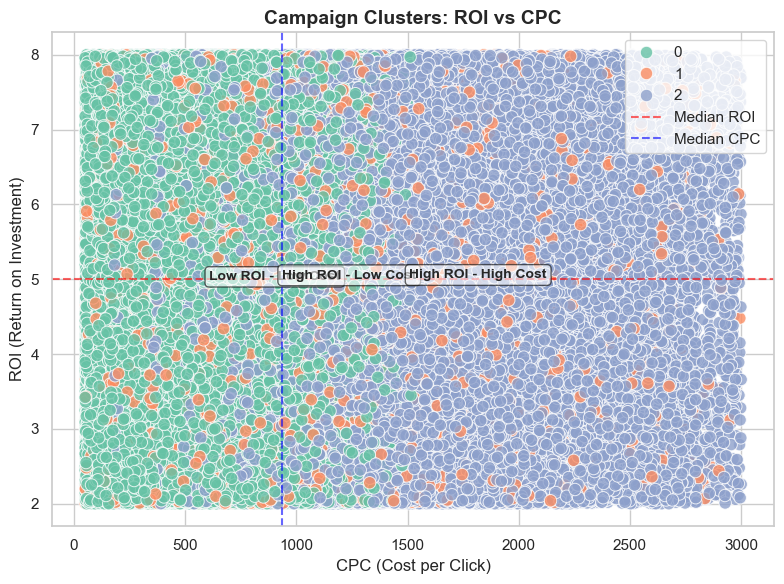

In [79]:
plt.figure(figsize=(8, 6))
sn.scatterplot(data=agg, x="CPC", y="ROI", hue="cluster", palette="Set2", s=80, alpha=0.8)

# Annotate cluster centers with their labels
for clust, row in cluster_profiles.iterrows():
    plt.text(x=row["CPC"], y=row["ROI"], s=row["label"], fontsize=10, weight="bold", 
             bbox=dict(facecolor="white", alpha=0.6, edgecolor="black", boxstyle="round,pad=0.3"))

plt.axhline(cluster_profiles["ROI"].median(), color="red", linestyle="--", alpha=0.6, label="Median ROI")
plt.axvline(cluster_profiles["CPC"].median(), color="blue", linestyle="--", alpha=0.6, label="Median CPC")
    
plt.title("Campaign Clusters: ROI vs CPC", fontsize=14, weight="bold")
plt.xlabel("CPC (Cost per Click)")
plt.ylabel("ROI (Return on Investment)")
plt.legend()
plt.tight_layout()

plt.show()

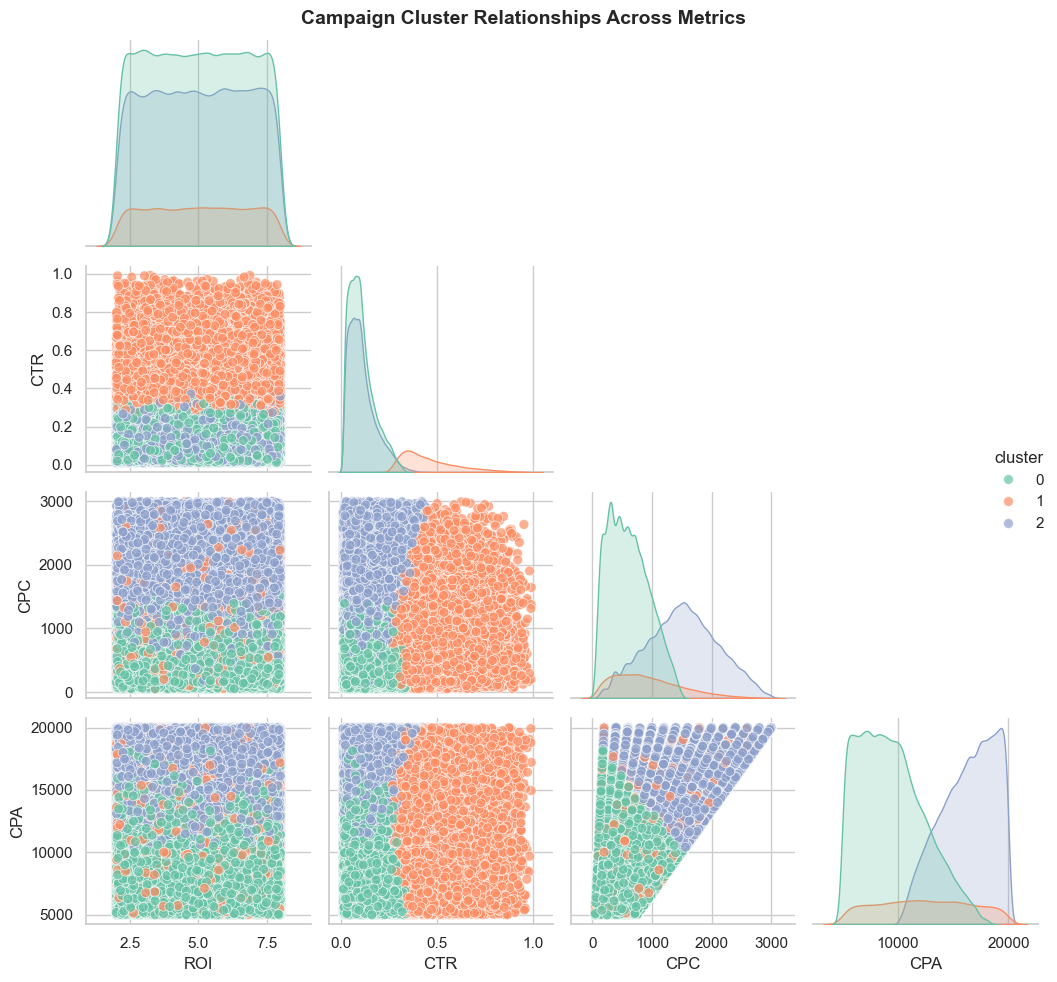

In [80]:
plot_features = ["ROI", "CTR", "CPC", "CPA"]
available_feats = [f for f in plot_features if f in agg.columns]

# Use seaborn pairplot
sn.set(style="whitegrid", font_scale=1.0)
pp = sn.pairplot(data=agg, vars=available_feats, hue="cluster", 
                  palette="Set2", diag_kind="kde", corner=True, 
                  plot_kws={"alpha": 0.7, "s": 50})

pp.fig.suptitle("Campaign Cluster Relationships Across Metrics", fontsize=14, weight="bold")
pp.fig.tight_layout()
pp.fig.subplots_adjust(top=0.95)  # adjust for title

plt.show()

# Comparing The Three Modelling Strategies.

In [81]:
def compare_models(classification_results: dict, regression_results: dict, clustering_summary: dict):
    """
    Compare classification, regression, and clustering results in a single table and visualization.

    Parameters
    ----------
    classification_results : dict
        Output from classification pipeline (model -> metrics).
    regression_results : dict
        Output from regression pipeline (model -> metrics).
    clustering_summary : dict
        Output from clustering pipeline (best_k, silhouette, profiles).
    """
    rows = []

    # Classification summary
    if classification_results:
        for model, res in classification_results.items():
            if "error" not in res:
                rows.append({
                    "Approach": f"Classification ({model})",
                    "Accuracy/F1/AUC": f"{res['test_accuracy']:.2f} / {res['test_f1']:.2f} / {res['test_auc']:.2f}",
                    "Error Metric": None,
                    "Cluster Metric": None
                })

    # Regression summary
    if regression_results:
        for model, res in regression_results.items():
            if "error" not in res:
                rows.append({
                    "Approach": f"Regression ({model})",
                    "Accuracy/F1/AUC": None,
                    "Error Metric": f"MAE={res['test_mae']:.2f}, RMSE={res['test_rmse']:.2f}, R²={res['test_r2']:.2f}",
                    "Cluster Metric": None
                })

    # Clustering summary
    if clustering_summary:
        rows.append({
            "Approach": f"Clustering (k={clustering_summary.get('best_k', '-')})",
            "Accuracy/F1/AUC": None,
            "Error Metric": None,
            "Cluster Metric": f"Silhouette={clustering_summary.get('silhouette', 0):.2f}, Campaigns={clustering_summary.get('n_campaigns', 0)}"
        })

    # Create comparison DataFrame
    comparison_df = pd.DataFrame(rows)

    print("\n=== Model Comparison Table ===")
    print(comparison_df)

    # --- Visualization ---
    plt.figure(figsize=(8, 5))
    ax = plt.gca()

    # Plot Classification AUC
    if classification_results:
        auc_scores = [
            res["test_auc"] for res in classification_results.values() if "error" not in res and res["test_auc"] is not None
        ]
        if auc_scores:
            plt.bar(["Classification (AUC)"], [np.mean(auc_scores)], color="skyblue", label="Classification AUC")

    # Plot Regression R²
    if regression_results:
        r2_scores = [
            res["test_r2"] for res in regression_results.values() if "error" not in res
        ]
        if r2_scores:
            plt.bar(["Regression (R²)"], [np.mean(r2_scores)], color="orange", label="Regression R²")

    # Plot Clustering Silhouette
    if clustering_summary and "silhouette" in clustering_summary:
        plt.bar(["Clustering (Silhouette)"], [clustering_summary["silhouette"]], color="green", label="Clustering Silhouette")

    plt.ylabel("Score")
    plt.title("Comparison of Classification, Regression, and Clustering")
    plt.legend()
    plt.tight_layout()
   
    plt.show()

    print("✅ Comparison bar plot saved at /mnt/data/model_comparison.png")

    return comparison_df


=== Model Comparison Table ===
                                 Approach     Accuracy/F1/AUC  \
0     Classification (LogisticRegression)  1.00 / 1.00 / 1.00   
1           Classification (RandomForest)  1.00 / 1.00 / 1.00   
2       Classification (GradientBoosting)  1.00 / 1.00 / 1.00   
3           Regression (LinearRegression)                None   
4      Regression (RandomForestRegressor)                None   
5  Regression (GradientBoostingRegressor)                None   
6                        Clustering (k=3)                None   

                   Error Metric                     Cluster Metric  
0                          None                               None  
1                          None                               None  
2                          None                               None  
3  MAE=0.63, RMSE=0.75, R²=0.81                               None  
4  MAE=0.01, RMSE=0.02, R²=1.00                               None  
5  MAE=0.28, RMSE=0.35, R²=0.96  

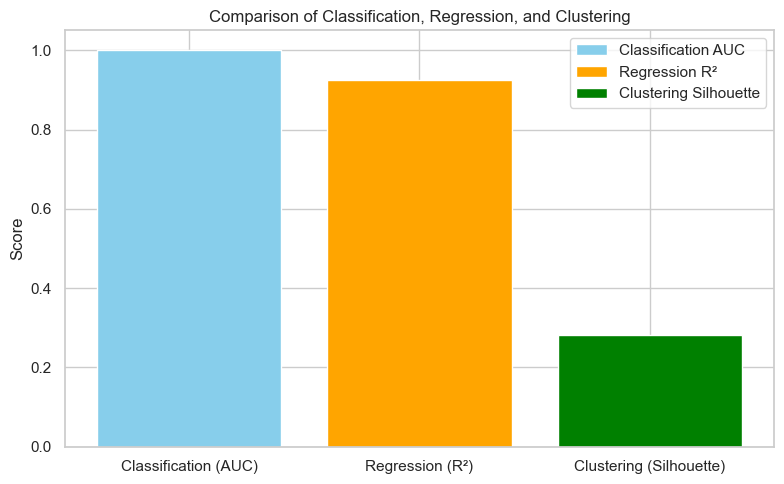

✅ Comparison bar plot saved at /mnt/data/model_comparison.png


,Approach,Accuracy/F1/AUC,Error Metric,Cluster Metric
0,Classification (LogisticRegression),1.00 / 1.00 / 1.00,None,None
1,Classification (RandomForest),1.00 / 1.00 / 1.00,None,None
2,Classification (GradientBoosting),1.00 / 1.00 / 1.00,None,None
3,Regression (LinearRegression),None,"MAE=0.63, RMSE=0.75, R²=0.81",None
4,Regression (RandomForestRegressor),None,"MAE=0.01, RMSE=0.02, R²=1.00",None
5,Regression (GradientBoostingRegressor),None,"MAE=0.28, RMSE=0.35, R²=0.96",None
6,Clustering (k=3),None,None,"Silhouette=0.28, Campaigns=200000"


In [82]:
compare_models(classification_results, regression_results, clustering_summary)